# Este código foi desenvolvido com objetivo de estudo da aplicabilidade da biblioteca SHAP e DICE-ML

O código utiliza a abordagem de regressão logística para transações fraudulentas de cartões de crédito. 

Desenvolvido por: Ronisio Xavier Junior - Agosto/2025

In [23]:
#Declaração das Bibliotecas

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import shap
import dice_ml as dice
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import dice_ml
from dice_ml import Dice


In [5]:
#Leitura do Dataset https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

df = pd.read_csv('../data/creditcard.csv')

# Identificação das principais características do Dataset

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Distribuição da variável alvo.
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# Descrição das variáveis
# Tipo de dado de cada coluna
# Quantidade de Nulos
# Total de colunas e linhas
# Nome das colunas (variáveis)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

count: O número de valores não-nulos.

mean: A média dos valores.

std: O desvio padrão, que indica a dispersão dos dados em relação à média.

min: O menor valor.

25%: O 1º quartil (Q1), que é o valor abaixo do qual 25% dos dados se encontram.

50%: A mediana (Q2), que é o valor do meio.

75%: O 3º quartil (Q3), que é o valor abaixo do qual 75% dos dados se encontram.

max: O maior valor.

In [9]:
# Resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


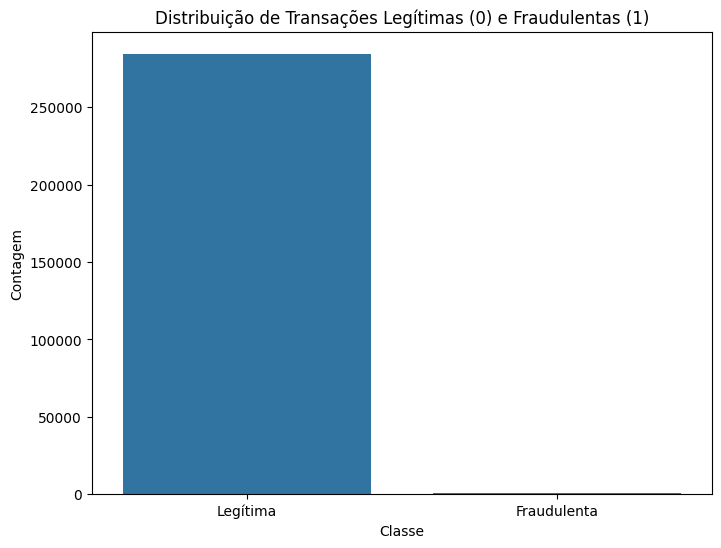

In [10]:
# Distribuição da variáve Alvo
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribuição de Transações Legítimas (0) e Fraudulentas (1)')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Legítima', 'Fraudulenta'])
plt.show()

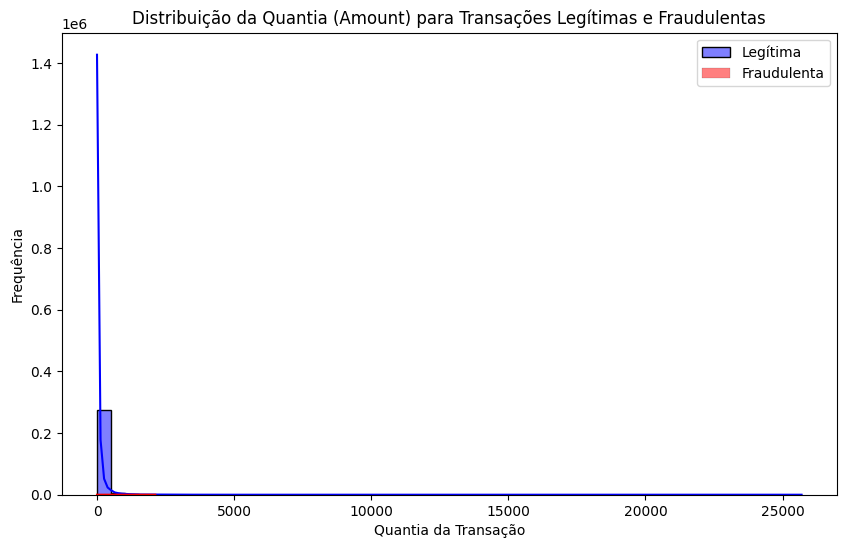

In [11]:
# Histograma da variável 'Amount' para transações legítimas e fraudulentas
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Legítima')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraudulenta')
plt.title('Distribuição da Quantia (Amount) para Transações Legítimas e Fraudulentas')
plt.xlabel('Quantia da Transação')
plt.ylabel('Frequência')
plt.legend()
plt.show()

É possível identificar pelos gráficos o desbalanceamento da variável alvo.

Esse tipo de situação pode impactar de maneira significativa o desempenho do modelo, pois, caso o modelo deixe de identificar todas os casos de fraude, ainda assim apresentaria uma alta acurácia.

Para contornar esse problema, faremos o balanceamento dos dados.

Vamos aplicar a técnica de Oversampling. Em vez de reduzir a quantidade de dados da classe majoritária (o que seria undersampling), vamos criar novas amostras da classe minoritária (transações fraudulentas).

A técnica mais popular para isso é a SMOTE (Synthetic Minority Over-sampling Technique). A SMOTE cria novas amostras sintéticas da classe minoritária, baseando-se em seus vizinhos mais próximos, tornando a distribuição mais equilibrada.

In [12]:
# Normalização da variável amount e aplicação do método SMOTE para balanceamento do dataset

X = df.drop('Class', axis=1)
y = df['Class']

#Normalizando a coluna Amount
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

#Eliminando a Coluna Time
X = X.drop('Time', axis=1)

# 20% dos dados para teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape dos dados de treino antes do balanceamento:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("---")

#Importante que o uso do Smote seja aplicado apenas nos dados de Treino

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Shape dos dados de treino depois do balanceamento com SMOTE:")
print(f"X_resampled: {X_resampled.shape}")
print(f"y_resampled: {y_resampled.shape}")
print("---")

print("Contagem de classes no conjunto de treino original:")
print(y_train.value_counts())
print("---")

print("Contagem de classes no conjunto de treino balanceado:")
print(y_resampled.value_counts())


Shape dos dados de treino antes do balanceamento:
X_train: (227845, 29)
y_train: (227845,)
---
Shape dos dados de treino depois do balanceamento com SMOTE:
X_resampled: (454902, 29)
y_resampled: (454902,)
---
Contagem de classes no conjunto de treino original:
Class
0    227451
1       394
Name: count, dtype: int64
---
Contagem de classes no conjunto de treino balanceado:
Class
0    227451
1    227451
Name: count, dtype: int64


Feito o tratamento, faremos a exploração de dois modelos:

Regressão Logística (Logistic Regression): Um modelo linear e simples, ótimo para servir como linha de base (baseline). É rápido de treinar e fácil de interpretar.

Árvore de Decisão (Decision Tree): Um modelo baseado em árvores que pode capturar relações não-lineares nos dados. É mais complexo que a regressão logística, mas pode ser muito poderoso.

Para verificarmos o desempenho, verificaremos as seguintes métricas:

Acurácia (Accuracy): A proporção de previsões corretas (fraude e não-fraude) sobre o total de previsões.

Precisão (Precision): Das transações que o modelo previu como fraude, qual a porcentagem que realmente era fraude? Alta precisão significa menos alarmes falsos.

Revocação (Recall): Das transações que realmente eram fraude, qual a porcentagem que o modelo conseguiu detectar? Alto recall significa que o modelo é bom em encontrar fraudes.

F1-Score: Uma média harmônica entre Precisão e Revocação. É uma métrica excelente para problemas com classes desequilibradas, pois considera tanto os alarmes falsos quanto as fraudes não detectadas.

Matriz de Confusão (Confusion Matrix): Um resumo visual que mostra a contagem de acertos e erros do modelo, separando-os em quatro categorias: Verdadeiros Positivos, Falsos Positivos, Verdadeiros Negativos e Falsos Negativos.



--- Treinando o modelo de Regressão Logística ---

--- Métricas da Regressão Logística ---
Acurácia: 0.9734
Precisão: 0.0563
Revocação: 0.9184
F1-Score: 0.1061


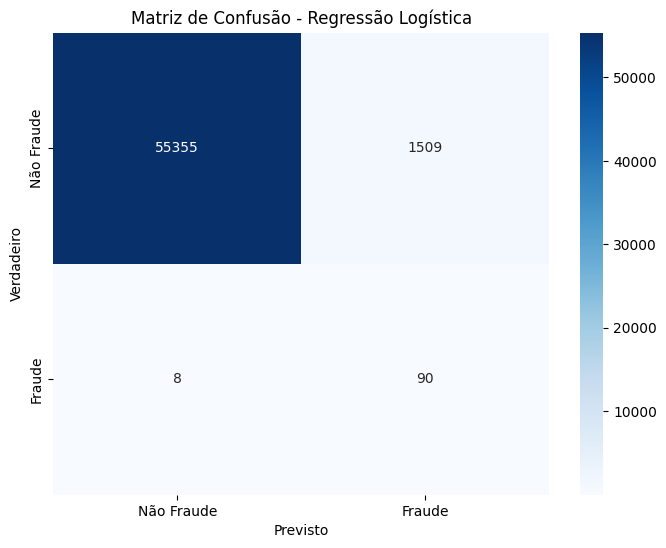


--- Treinando o modelo de Árvore de Decisão ---

--- Métricas da Árvore de Decisão ---
Acurácia: 0.9972
Precisão: 0.3598
Revocação: 0.7857
F1-Score: 0.4936


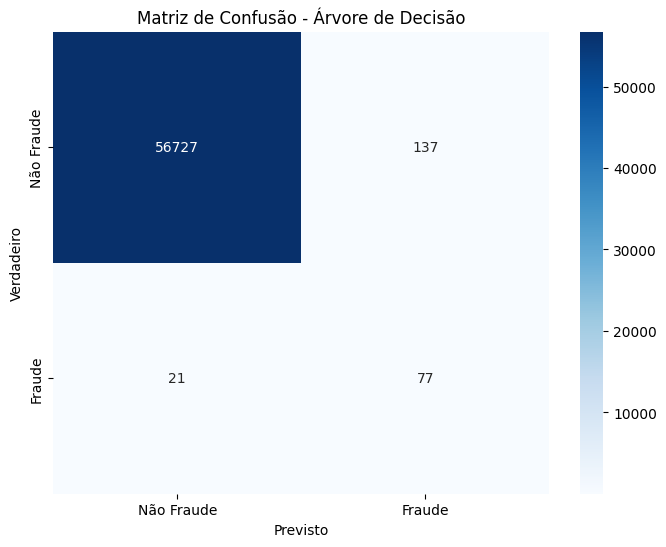

In [14]:
# Treinamento dos Modelos - Regressão e Árvore de Decisão

### Regressão Logística ###
print("--- Treinando o modelo de Regressão Logística ---")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

print("\n--- Métricas da Regressão Logística ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Revocação: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.4f}")

# Visualizando a Matriz de Confusão para Regressão Logística
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

### Árvore de Decisão ###
print("\n--- Treinando o modelo de Árvore de Decisão ---")
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_resampled, y_resampled)
y_pred_tree_clf = tree_clf.predict(X_test)

print("\n--- Métricas da Árvore de Decisão ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_tree_clf):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_tree_clf):.4f}")
print(f"Revocação: {recall_score(y_test, y_pred_tree_clf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tree_clf):.4f}")

# Visualizando a Matriz de Confusão para Árvore de Decisão
cm_tree_clf = confusion_matrix(y_test, y_pred_tree_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree_clf, annot=True, fmt="d", cmap="Blues", xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

Considerando o RECALL, utilizaremos o modelo de regressão logística para aplicar a biblioteca SHAP e DICE, para obtermos explicação do comportamento das variáveis e gerarmos cenários contrafactuais. 

In [15]:

# Análise utilizando o SHAP

# Solução: Amostra reduzida para o background data
n_samples = 500
background_data = X_resampled.sample(n=n_samples, random_state=42)

print("--- Analisando a importância das variáveis com SHAP ---")

# O explainer deve ser instanciado com o background_data
explainer = shap.KernelExplainer(log_reg.predict, background_data)

# Vamos pegar uma única amostra de teste para explicar
test_sample = X_test.iloc[0].to_frame().T # to_frame().T garante que o formato esteja correto

# Calcule os valores SHAP para a amostra de teste
shap_values_test = explainer.shap_values(test_sample)

# O KernelExplainer retorna os valores SHAP diretamente para a previsão
# de uma classe. A chamada predict_proba retorna os valores para as 2 classes
# A chamada predict retorna para a classe prevista. 

# A partir daqui, o código para plotagem é o mesmo
print("\nGráfico SHAP para a primeira transação de teste:")
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test, test_sample)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


--- Analisando a importância das variáveis com SHAP ---


100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


Gráfico SHAP para a primeira transação de teste:


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [03:57<00:00,  4.20it/s]



--- Gerando o Gráfico de Resumo SHAP ---


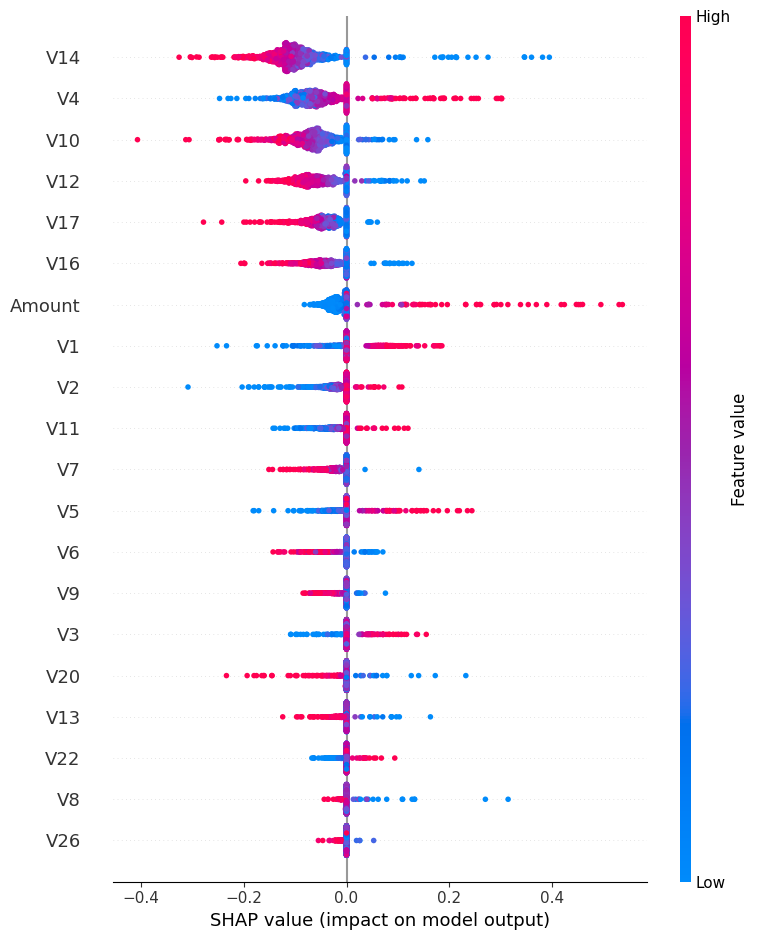


--- Gerando o Gráfico de Dependência SHAP ---


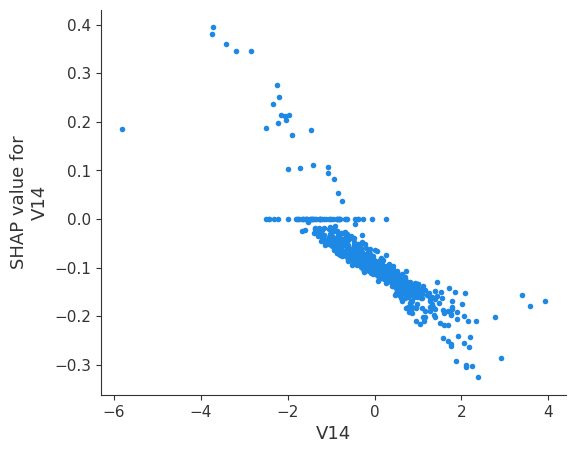

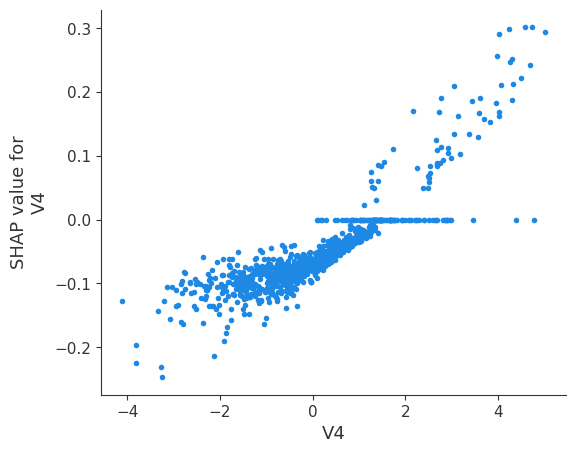

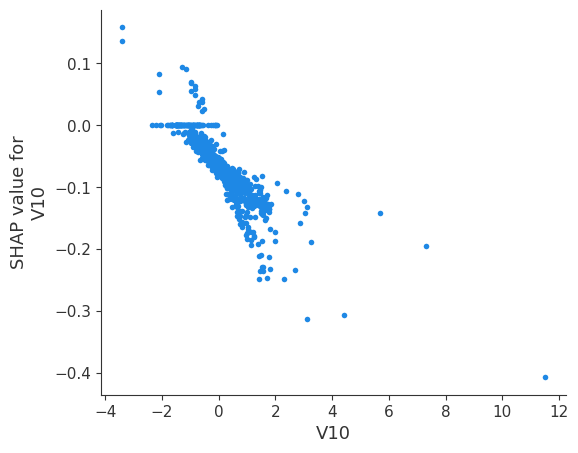

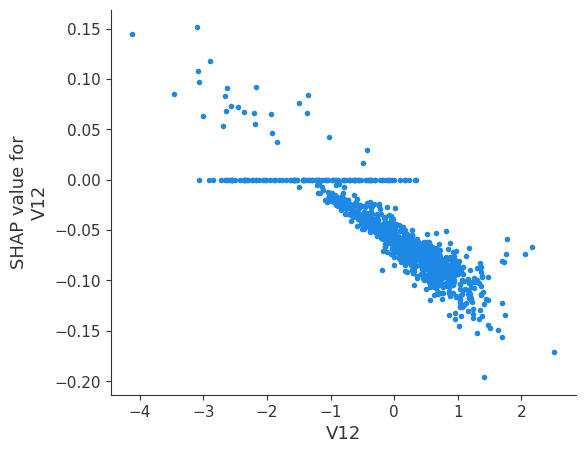

In [16]:

explainer = shap.KernelExplainer(log_reg.predict, background_data)


X_test_sample_global = X_test.sample(n=1000, random_state=42)


shap_values_global = explainer.shap_values(X_test_sample_global)


print("\n--- Gerando o Gráfico de Resumo SHAP ---")
shap.summary_plot(shap_values_global, X_test_sample_global)



print("\n--- Gerando o Gráfico de Dependência SHAP ---")

shap.dependence_plot("V14", shap_values_global, X_test_sample_global, interaction_index=None)
shap.dependence_plot("V4", shap_values_global, X_test_sample_global, interaction_index=None)
shap.dependence_plot("V10", shap_values_global, X_test_sample_global, interaction_index=None)
shap.dependence_plot("V12", shap_values_global, X_test_sample_global, interaction_index=None)

In [25]:

print("--- Gerando Cenários Contrafactuais com DiCE ---")

# 1. Preparando os dados: unir X e y
df = pd.concat([X_resampled, y_resampled], axis=1)

# 2. Criando o objeto Data
data_dice = dice_ml.Data(
    dataframe=df,
    continuous_features=X_resampled.columns.tolist(),  # features contínuas
    outcome_name="Class"  # nome da coluna alvo
)

# 3. Criando o objeto Model
model_dice = dice_ml.Model(model=log_reg, backend="sklearn")

# 4. Criando o objeto Dice
d = Dice(data_dice, model_dice, method="random")  # ou 'genetic' se preferir

# 5. Selecionando uma transação de fraude
fraud_example = X_test[y_test == 1].iloc[0:1]  # precisa estar no formato DataFrame (não Series)

# 6. Gerando contrafactuais
dice_exp = d.generate_counterfactuals(
    fraud_example,
    total_CFs=3,
    desired_class="opposite"
)

# 7. Visualizando
print("\n--- Transação Original (Rotulada como Fraude) ---")
print(fraud_example)

print("\n--- Cenários Contrafactuais (O que precisa mudar para que seja Legítima) ---")
dice_exp.visualize_as_dataframe(show_only_changes=True)

--- Gerando Cenários Contrafactuais com DiCE ---


100%|██████████| 1/1 [00:27<00:00, 27.76s/it]


--- Transação Original (Rotulada como Fraude) ---
             V1        V2        V3       V4        V5        V6        V7  \
77348 -1.271244  2.462675 -2.851395  2.32448 -1.372245 -0.948196 -3.065234   

             V8        V9       V10  ...       V20       V21       V22  \
77348  1.166927 -2.268771 -4.881143  ...  0.560478  0.652941  0.081931   

            V23       V24       V25       V26     V27       V28    Amount  
77348 -0.221348 -0.523582  0.224228  0.756335  0.6328  0.250187 -0.353189  

[1 rows x 29 columns]

--- Cenários Contrafactuais (O que precisa mudar para que seja Legítima) ---
Query instance (original outcome : 1)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.271244,2.462675,-2.851395,2.32448,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,-4.881143,...,0.652941,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.6328,0.250187,-0.353189,1



Diverse Counterfactual set (new outcome: 0)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-,-,-,-,-91.963385,-,-,-,11.30737182,-,...,-,-,-,-,-,-,-,-,-,0.0
1,-54.197654,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
